# Hello World Example
This uses the jupyter magic commands to create a simple example of how to use Hamilton.

In [ ]:
#! pip install pandas "sf-hamilton[visualization]"

In [10]:
# Cell 1 - import the things you need
import logging
import sys
from hamilton import driver

%load_ext hamilton.plugins.jupyter_magic
logging.basicConfig(stream=sys.stdout)

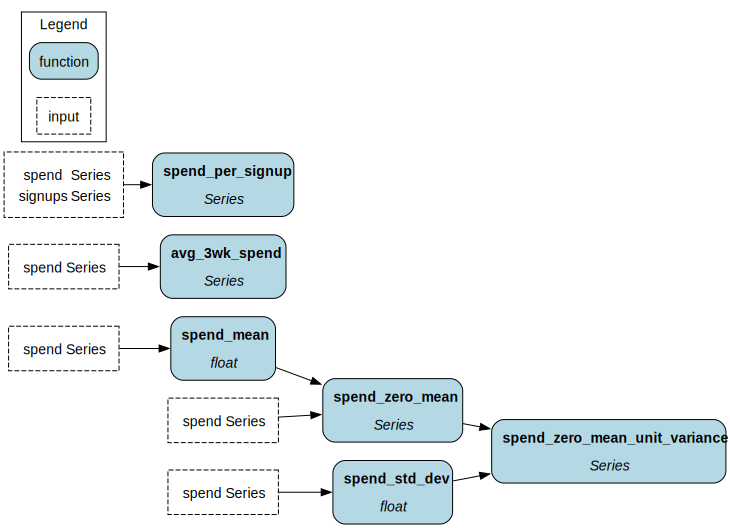

In [2]:
%%cell_to_module my_functions --display
# Cell 2 - Define your functions in a module.
import pandas as pd

def avg_3wk_spend(spend: pd.Series) -> pd.Series:
    """Rolling 3 week average spend."""
    return spend.rolling(3).mean()

def spend_per_signup(spend: pd.Series, signups: pd.Series) -> pd.Series:
    """The cost per signup in relation to spend."""
    return spend / signups

def spend_mean(spend: pd.Series) -> float:
    """Shows function creating a scalar. In this case it computes the mean of the entire column."""
    return spend.mean()

def spend_zero_mean(spend: pd.Series, spend_mean: float) -> pd.Series:
    """Shows function that takes a scalar. In this case to zero mean spend."""
    return spend - spend_mean

def spend_std_dev(spend: pd.Series) -> float:
    """Function that computes the standard deviation of the spend column."""
    return spend.std()

def spend_zero_mean_unit_variance(spend_zero_mean: pd.Series, spend_std_dev: float) -> pd.Series:
    """Function showing one way to make spend have zero mean and unit variance."""
    return spend_zero_mean / spend_std_dev


In [3]:
# Cell 3 - Optional - if you have existing modules you can import them here.
# We use the autoreload extension that comes with ipython to automatically reload modules when
# the code in them changes.

# import the jupyter extension
%load_ext autoreload
# set it to only reload the modules imported
%autoreload 1
# import the function modules you want to reload when they change.
# i.e. these should be your modules you write your functions in. As you change them,
# they will be reimported without you having to do anything.
# %aimport NAME_OF_MODULE   # uncomment and replace NAME_OF_MODULE with the name of your module

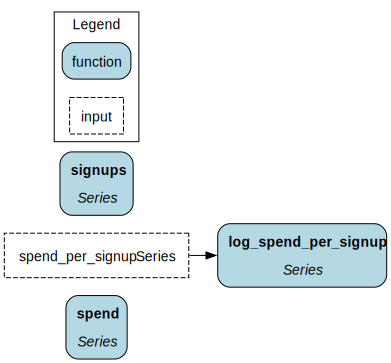

In [4]:
%%cell_to_module extra_functions --display
# Cell 4 - Define your new Hamilton functions 
import numpy as np
import pandas as pd
# Look at `my_functions` to see how these functions connect.
def signups() -> pd.Series:
    """Returns sign up values"""
    return pd.Series([1, 10, 50, 100, 200, 400])

def spend() -> pd.Series:
    """Returns the spend values"""
    return pd.Series([10, 10, 20, 40, 40, 50])

def log_spend_per_signup(spend_per_signup: pd.Series) -> pd.Series:
    """Simple function taking the logarithm of spend over signups."""
    return np.log(spend_per_signup)

In [5]:
# Cell 5 - Instantiate the Hamilton driver and pass it the right things in.
initial_config = {}
# my_functions and extra_functions are the modules we created in cells 2 and 4.
dr = driver.Driver(initial_config, my_functions, extra_functions)  # can pass in multiple modules
# we need to specify what we want in the final dataframe.
output_columns = [
    "spend",
    "signups",
    "avg_3wk_spend",
    "spend_per_signup",
    "spend_zero_mean_unit_variance",
]

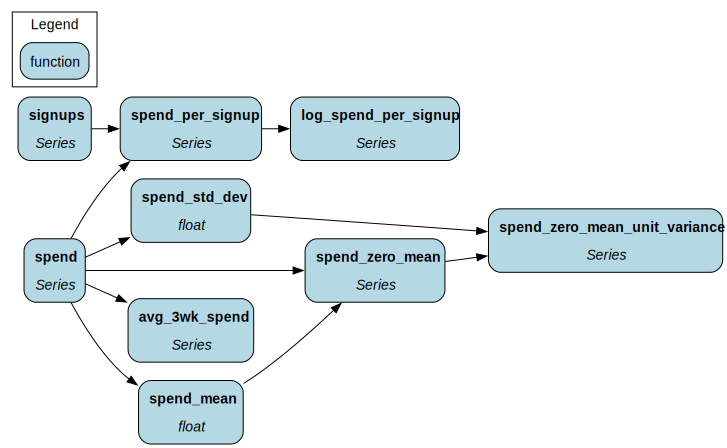

In [6]:
# Cell 5 - visualize execution
# To visualize do `pip install "sf-hamilton[visualization]"` if you want these to work

# visualize all possible functions
dr.display_all_functions()  # no args needed for jupyter

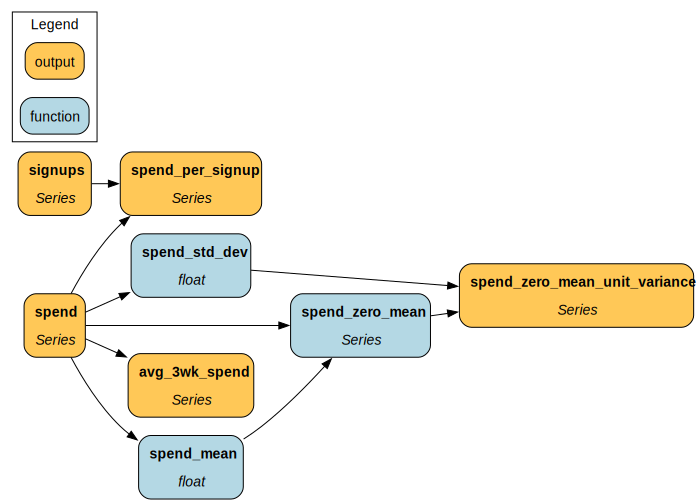

In [7]:
# visualize just the execution path
dr.visualize_execution(output_columns)   # no other args needed for jupyter

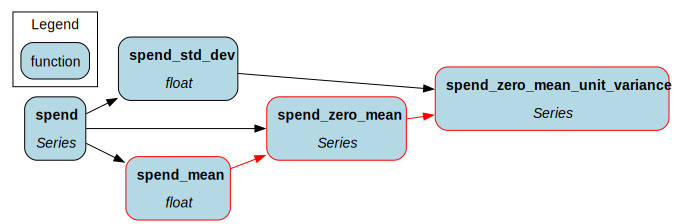

In [8]:
# visualize the path of execution between two functions
dr.visualize_path_between("spend_mean", "spend_zero_mean_unit_variance",
                          strict_path_visualization=False)

In [9]:
# let's create the dataframe!
dr.execute(output_columns)

,spend,signups,avg_3wk_spend,spend_per_signup,spend_zero_mean_unit_variance
0,10,1,NaN,10.000,-1.064405
1,10,10,NaN,1.000,-1.064405
2,20,50,13.333333,0.400,-0.483821
3,40,100,23.333333,0.400,0.677349
4,40,200,33.333333,0.200,0.677349
5,50,400,43.333333,0.125,1.257934
